In [1]:
import patchseq_utils.analysis as utils
import patchseq_utils.plotting as plot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('use_inf_as_na', True)
pd.options.display.max_columns=300
pd.options.display.max_rows=300
sns.set(style='ticks', context='talk')
from importlib import reload

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
from patchseq_utils import l1_load
from patchseq_utils import util
from importlib import reload
reload(l1_load)
reload(util)

<module 'patchseq_utils.util' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py'>

In [3]:
from patchseq_utils.l1_load import *
from patchseq_utils.util import *

In [5]:
human_df.loc[lambda df: df['first_isi_inv_hero']>1000, 'first_isi_inv_hero'] = np.nan
human_df.loc[lambda df: df['first_isi_inv_rheo']>1000, 'first_isi_inv_rheo'] = np.nan

## Tnfaip

In [5]:
umap_df = pd.read_csv("/home/tom.chartrand/work/r_patchseq/l1_manuscript/umap_integrated.csv", index_col=0)
human_df = human_df.join(umap_df, on='sample_id')


<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

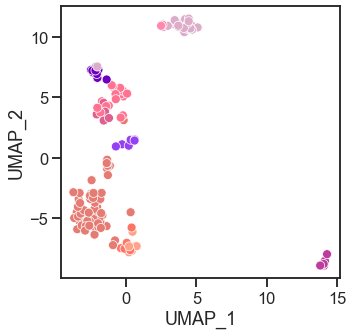

In [44]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=human_df, x='UMAP_1', y='UMAP_2', hue=cluster, palette=palette_human, legend=False)

<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

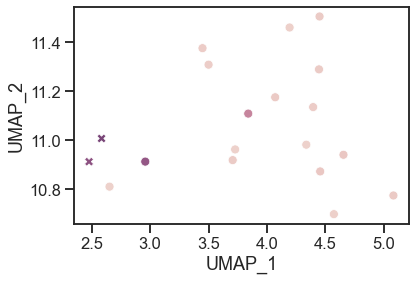

In [19]:
df = human_df.query("homology_type=='Pax6'")
sns.scatterplot(data=df, x='UMAP_1', y='UMAP_2', hue='first_isi_inv_rheo', style=cluster, legend=False)

<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

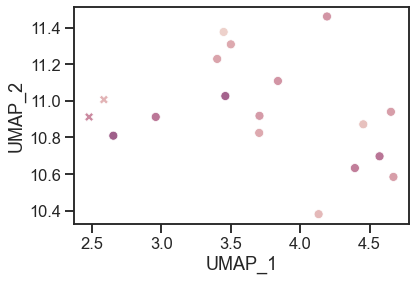

In [22]:
df = human_df.query("homology_type=='Pax6'")
sns.scatterplot(data=df, x='UMAP_1', y='UMAP_2', hue='sag_depol', style=cluster, legend=False)

In [13]:
cols = ['topLeaf', 'topLeafValue', 'Tree_second_cl', 'Tree_second_bt']
df.query("UMAP_2<10.8 & UMAP_1<3")[cols]

,topLeaf,topLeafValue,Tree_second_cl,Tree_second_bt
spec_id,,,,
1005116394,Inh L1-2 PAX6 CDH12,0.5,Inh L1-2 VIP TSPAN12,0.28


1005116394 morph


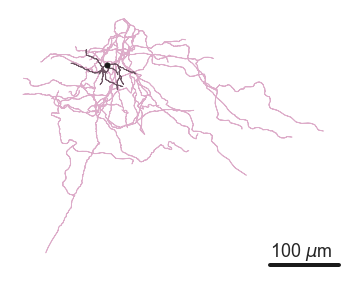

1005116394 ephys


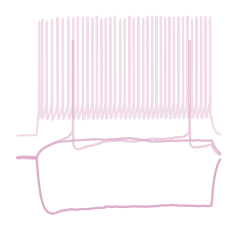

In [10]:
plot_trace_morph(1005116394, rotate=0)

In [15]:
df.query("UMAP_2<11 & UMAP_1<3 & UMAP_1>2.8")[cols]

,topLeaf,topLeafValue,Tree_second_cl,Tree_second_bt
spec_id,,,,
840043506,Inh L1-2 PAX6 CDH12,0.96,Inh L1-2 PAX6 TNFAIP8L3,0.04


840043506 morph


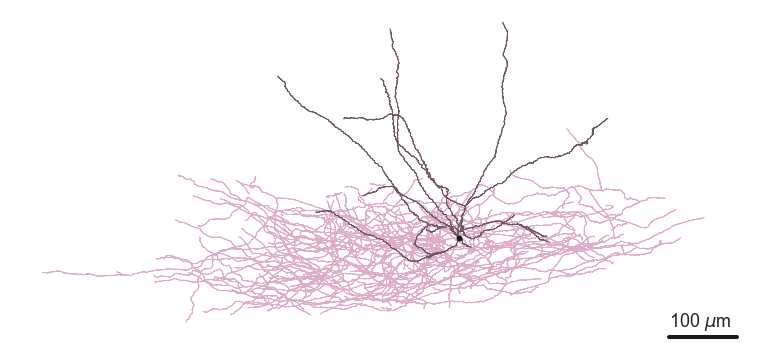

840043506 ephys


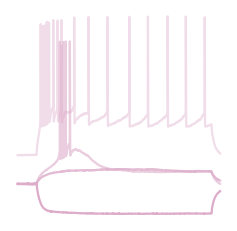

In [16]:
plot_trace_morph(840043506, rotate=0)

### All morph

In [385]:
ttype = "TNFAIP"
cells = human_df.loc[lambda df: df['topLeaf'].str.contains(ttype)
                        & (df['contam_sum']<2)
                         & df['has_morph']
                     , cols]
cells

,cell_name,collaborator,has_morph,has_ephys,fail_tags_qc,layer,normalized_layer_depth,contam_sum,topLeafValue
spec_id,,,,,,,,,
828758585,H19.28.005.11.05.01,Gabor,True,False,Invalid seal (None); initial_access_resistance...,1,0.463773,0.626373,0.23
1001478009,H20.03.302.11.09.01.08,AIBS,True,False,NaN,1,0.591007,0.883839,1.00
840142358,H19.06.351.11.10.01.11,AIBS,True,True,NaN,1,0.246231,0.793866,0.99


828758585


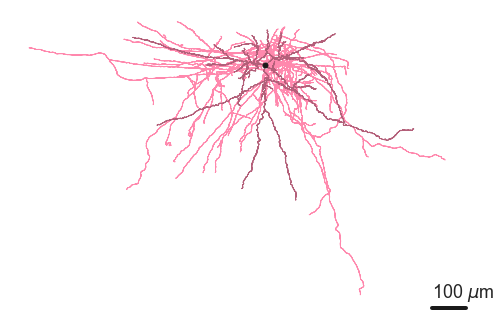

/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Short square
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Capacitance
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Chirp test
  warnings.warn("Could not find stimulus: %s" % tag)


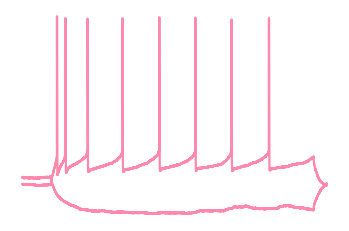

1001478009


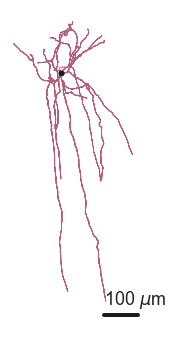

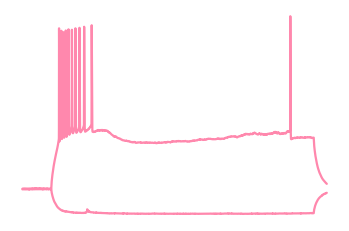

840142358


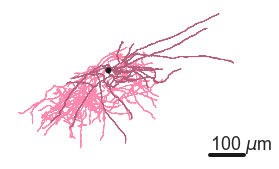

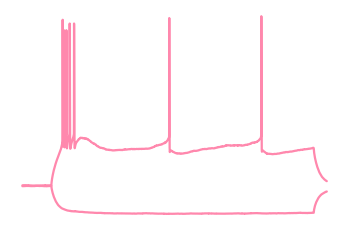

In [386]:
for cell in cells.index:
    print(cell)
    plot_trace_morph(cell, rotate=180, scale_factor=200)

### TNFAIP burst

/local1/storage/envs/ipfx3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


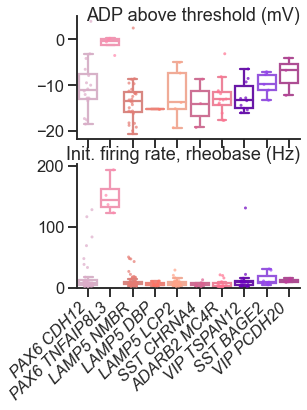

In [33]:
# bursting
human_df['adp_deltav'] = (human_df.adp_v_last_rheo - human_df.threshold_v_rheo)
human_df['adp_deltav'].loc[lambda x: x>50] = np.nan
features = [
#            'adp_v_last_rheo',
    'adp_deltav',
   'first_isi_inv_rheo',
#    'mean_isi_rheo',
#     'first_isi_inv_hero'
#             'isi_var_ratio'
           ]
labels=[
    'ADP above threshold (mV)',
    'Init. firing rate, rheobase (Hz)'
]
util.plot_boxplot_multiple(human_df, features, labels=labels, x=cluster, figsize=(4,5), pad_title=-5,
                        palette=palette_human, label_counts=False)

In [53]:
reload(utils)
reload(plot)

<module 'patchseq_utils.plotting' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/plotting.py'>

In [32]:
def plot_subclass_focus(data, y, x, ax, subclass, label=None, **kwargs):
    s = 4
    data=human_df.query(f"homology_type=='{subclass}'").pipe(remove_unused_categories)
    plot.box_strip(data=data, ax=ax, x=x, size=s,
                   y=y, hue=cluster, palette=palette_human, dodge=True, legend=False, transparent=False,
                  order=palette_subclass.keys())

    data=human_df.query(f"homology_type!='{subclass}'")
    utils.plot_box_cluster_feature(data, y, x, x_fine=cluster, ax=ax, size=s, label=label,
                                   drop_box='other', label_counts=False,
                                   palette_fine=palette_human, palette=palette_subclass, **kwargs)

/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py:45: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df[c].cat.remove_unused_categories(inplace=True)
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


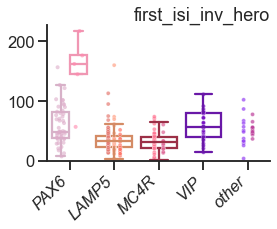

In [31]:
fig, ax = plt.subplots(figsize=(4,2.5))
y = 'first_isi_inv_hero'
x = 'homology_type'
subclass = 'PAX6'
plot_subclass_focus(data, y, x, ax, subclass)

/tmp/ipykernel_15979/421471882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_df['adp_deltav'].loc[lambda x: x>50] = np.nan
/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py:45: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df[c].cat.remove_unused_categories(inplace=True)
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py:45: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is de

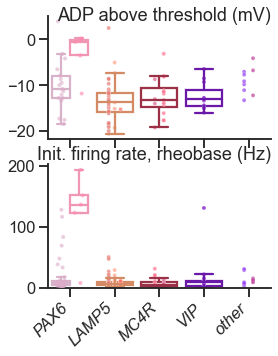

In [54]:
# bursting
human_df['adp_deltav'] = (human_df.adp_v_last_rheo - human_df.threshold_v_rheo)
human_df['adp_deltav'].loc[lambda x: x>50] = np.nan
features = [
    'adp_deltav',
   'first_isi_inv_rheo',
           ]
labels=[
    'ADP above threshold (mV)',
    'Init. firing rate, rheobase (Hz)'
]
utils.plot_boxplot_multiple(human_df, features, labels=labels, x='homology_type', figsize=(4,5), pad_title=-5,
                        plot_function=plot_subclass_focus, subclass='PAX6')

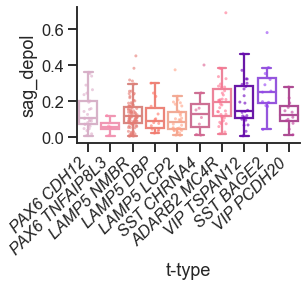

In [46]:
plot.box_strip(data=human_df, x=cluster, y=human_df.sag_depol, hue=cluster, palette=palette_human, dodge=False, legend=False)

### Morpho features

In [29]:
res = util.run_twosamp(df, list(morph_features), cluster)
res.head()

,pval_mw,roc_auc,pval_t,cohens_d,nobs,pval_t_fdr,pval_mw_fdr
feature,,,,,,,
basal_dendrite_extent_x,0.010526,1.000000,0.000002,2.839253,20,0.000083,0.154386
axon_pct_intersect_basal_dendrite_none,0.010526,1.000000,0.033282,1.591353,20,0.169381,0.154386
basal_dendrite_total_length_none,0.010526,1.000000,0.000012,2.717095,20,0.000264,0.154386
axon_emd_with_basal_dendrite_none,0.021053,0.972222,0.034653,1.580679,20,0.169381,0.231579
basal_dendrite_num_branches_none,0.026600,1.000000,0.000037,2.626995,20,0.000540,0.234084


/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py:45: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df[c].cat.remove_unused_categories(inplace=True)
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py:45: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df[c].cat.remove_unused_categories(inplace=True)
/local1/storage/envs/ipfx38/lib/python3.8/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask

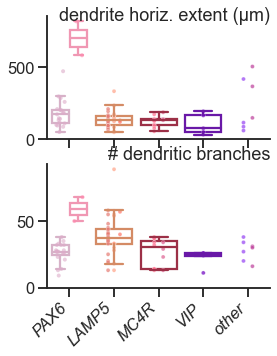

In [56]:
features = ["basal_dendrite_extent_x", "basal_dendrite_num_branches"]
labels = ['dendrite horiz. extent (μm)', '# dendritic branches']
# util.plot_boxplot_multiple(human_df, features, labels=labels, x=cluster, figsize=(4,5), pad_title=-5,
#                         palette=palette_human, label_counts=False)

utils.plot_boxplot_multiple(human_df, features, labels=labels, x='homology_type', figsize=(4,5), pad_title=-5,
                        plot_function=plot_subclass_focus, subclass='PAX6')
plt.tic

## Mouse comparison

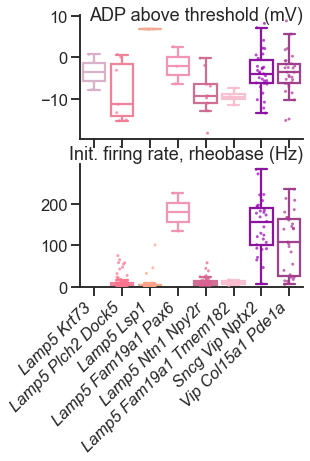

In [34]:
# bursting
mouse_df['adp_deltav'] = (mouse_df.adp_v_last_rheo - mouse_df.threshold_v_rheo)
# mouse_df['adp_deltav'].loc[lambda x: x>50] = np.nan
features = [
    'adp_deltav',
   'first_isi_inv_rheo',
           ]
labels=[
    'ADP above threshold (mV)',
    'Init. firing rate, rheobase (Hz)'
]
utils.plot_boxplot_multiple(mouse_df, features, labels=labels, x=cluster, figsize=(4,5), pad_title=-5,
                        palette=palette_mouse, label_counts=False)

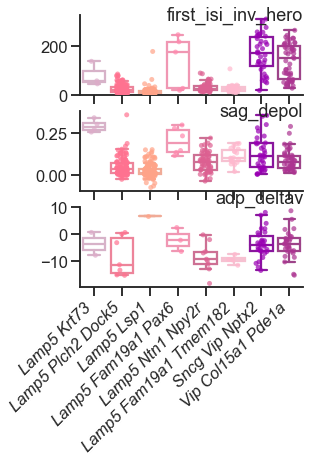

In [35]:
features = ["first_isi_inv_hero", "sag_depol", 'adp_deltav']
labels = features
utils.plot_boxplot_multiple(mouse_df, features, labels=labels, x=cluster, figsize=(4,5), pad_title=-5,
                        palette=palette_mouse, label_counts=False, s=5)

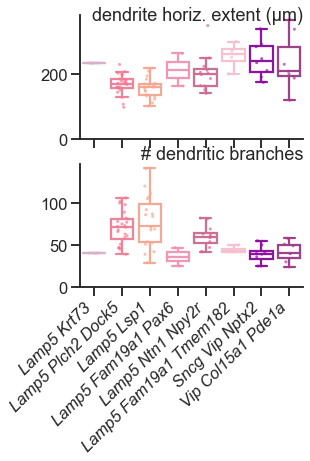

In [11]:
features = ["basal_dendrite_extent_x", "basal_dendrite_num_branches"]
labels = ['dendrite horiz. extent (μm)', '# dendritic branches']
utils.plot_boxplot_multiple(mouse_df, features, labels=labels, x=cluster, figsize=(4,5), pad_title=-5,
                        palette=palette_mouse, label_counts=False)

## Mouse examples

In [25]:
import patchseq_utils.lims as lims
reload(lims)
import patchseq_utils.plot.sweeps as ps
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [36]:
cells = mouse_df.loc[lambda df: df['topLeaf'].str.contains('Krt73')]
features = ["first_isi_inv_hero", "sag_depol", 'adp_deltav']
cells[features]

,first_isi_inv_hero,sag_depol,adp_deltav
spec_id,,,
855275163,58.004640,0.272952,NaN
935084855,137.362637,0.303722,0.724998
710346584,NaN,NaN,NaN
987138425,NaN,0.257356,NaN
1131310191,45.998160,0.342648,-7.718746


In [37]:
reload(ps)

<module 'patchseq_utils.plot.sweeps' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/plot/sweeps.py'>

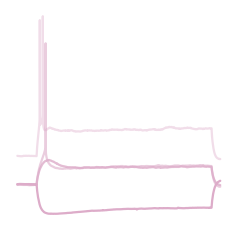

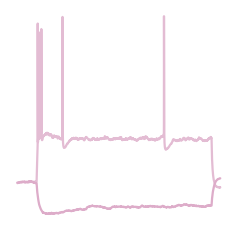

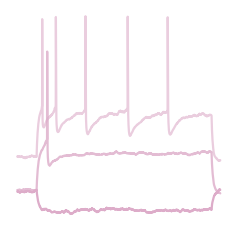

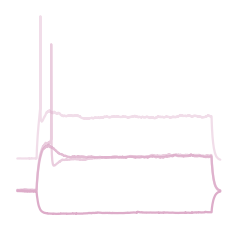

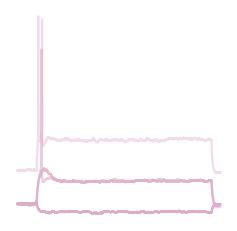

In [39]:
for cell in cells.index:
    dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True, sweeps_query=None)
    ps.plot_sweep_panel(dataset, sweeps, color=palette_mouse[cells.loc[cell, cluster]])
    plt.show()

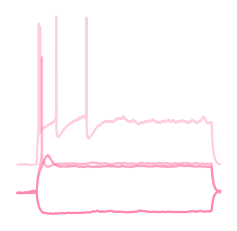

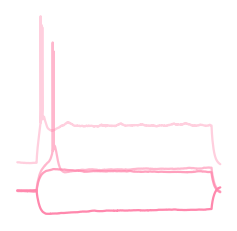

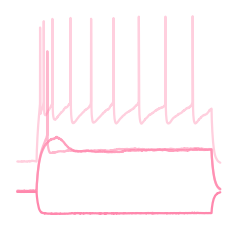

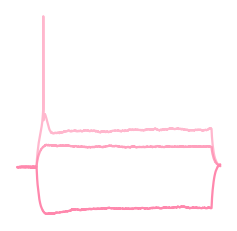

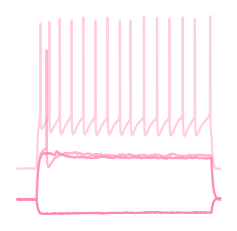

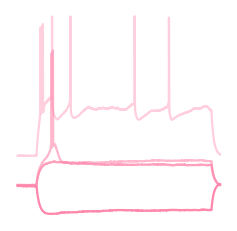

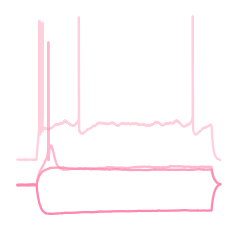

In [27]:
cells = mouse_df.loc[lambda df: df['topLeaf'].str.contains('Pax6')]
for cell in cells.index:
    dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True, sweeps_query=None)
    ps.plot_sweep_panel(dataset, sweeps, color=palette_mouse[cells.loc[cell, cluster]])

## Human Examples

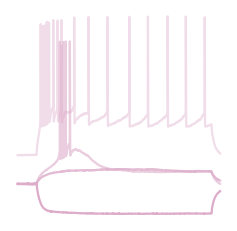

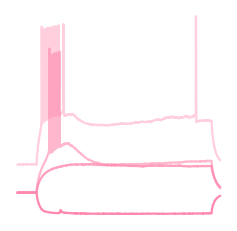

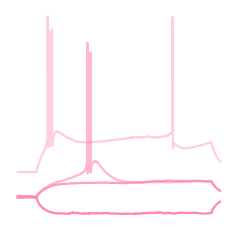

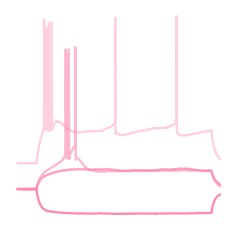

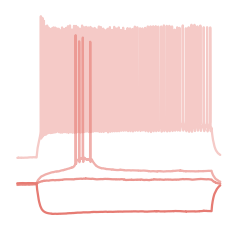

In [64]:
cells = human_df[human_df.adp_deltav>-1]
for cell in cells.index:
    dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True, sweeps_query=None)
    ps.plot_sweep_panel(dataset, sweeps, color=palette_human[cells.loc[cell, cluster]])

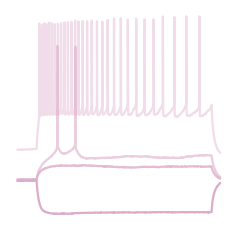

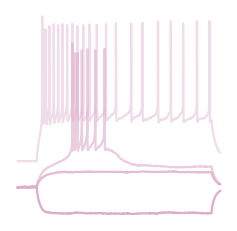

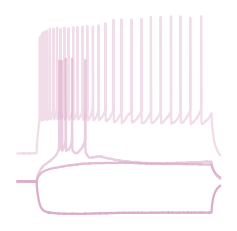

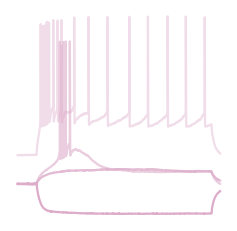

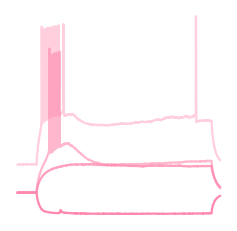

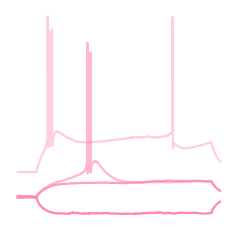

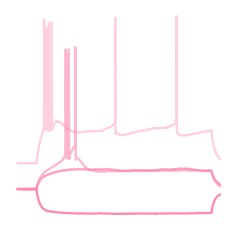

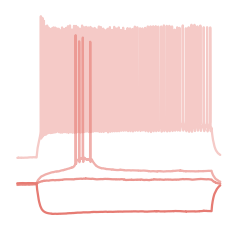

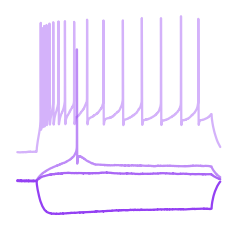

In [67]:
cells = human_df[human_df.first_isi_inv_hero>100]
for cell in cells.index:
    dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True, sweeps_query=None)
    ps.plot_sweep_panel(dataset, sweeps, color=palette_human[cells.loc[cell, cluster]])

In [10]:
cols = ['topLeaf', 'topLeafValue',]
cells = human_df.query('has_morph & first_isi_inv_rheo>50')
cells[cols]

,topLeaf,topLeafValue
spec_id,,
654341386,Inh L1-2 PAX6 CDH12,1.00
839970928,Inh L1-2 PAX6 CDH12,1.00
840043506,Inh L1-2 PAX6 CDH12,0.90
1001478009,Inh L1-2 PAX6 TNFAIP8L3,1.00
840142358,Inh L1-2 PAX6 TNFAIP8L3,0.99


1036182166


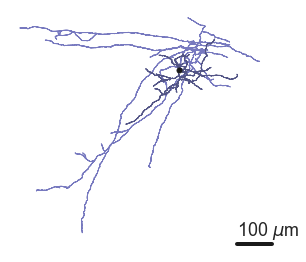

/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Short square
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Capacitance
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Chirp test
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Triple
  warnings.warn("Could not find stimulus: %s" % tag)


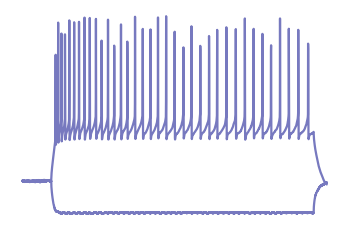

840043506


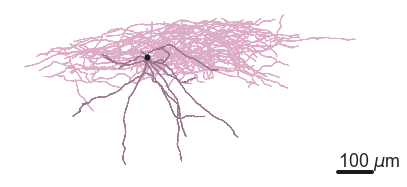

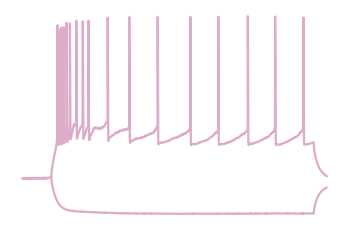

1001478009


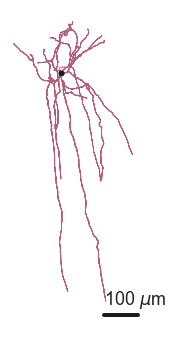

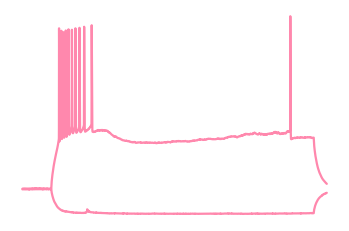

840142358


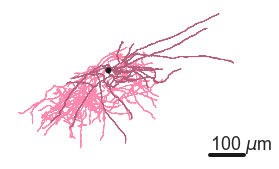

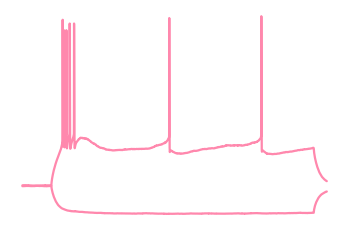

In [411]:
for cell in cells.index:
    print(cell)
    plot_trace_morph(cell, rotate=180, scale_factor=200)

(-28.775, 10.0)

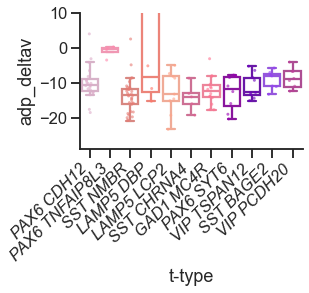

In [17]:
cluster = 't-type'
human_df['adp_deltav'] = (human_df.adp_v_last_rheo - human_df.threshold_v_rheo)
# adp = (human_df.adp_v_last_rheo - human_df.threshold_v_rheo)
plot.box_strip(data=human_df, x=cluster, y='adp_deltav', hue=cluster, palette=palette_human, dodge=False, legend=False)
plt.ylim(None,10)

In [19]:
pd.options.display.max_columns=200
pd.options.display.max_rows=300
cells = human_df.loc[lambda df: df['adp_deltav']>-1].query('has_morph')
cells[cols]

,topLeaf,topLeafValue
spec_id,,
1036182166,Inh L1-3 VIP ADAMTSL1,0.50
840043506,Inh L1-2 PAX6 CDH12,0.90
1001478009,Inh L1-2 PAX6 TNFAIP8L3,1.00
840142358,Inh L1-2 PAX6 TNFAIP8L3,0.99


840142358 morph


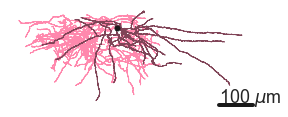

840142358 ephys


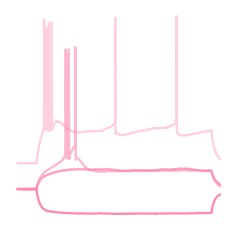

In [40]:
cell =840142358
plot_trace_morph(cell, rotate=150, scale_factor=200)

1036182166


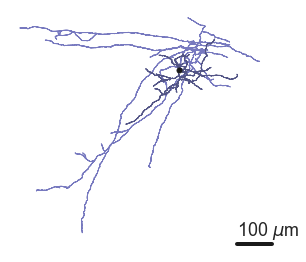

/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Short square
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Capacitance
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Chirp test
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Triple
  warnings.warn("Could not find stimulus: %s" % tag)


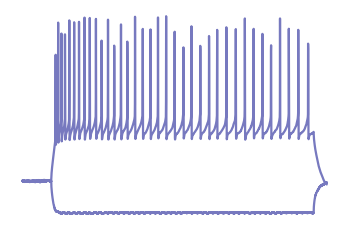

840043506


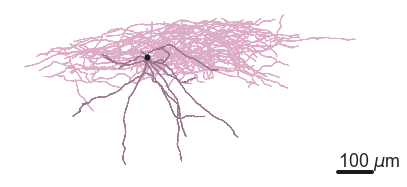

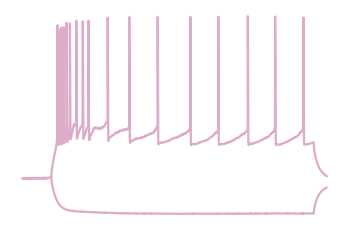

1001478009


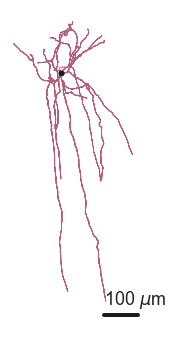

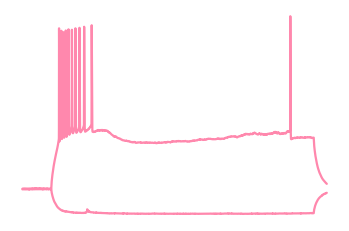

840142358


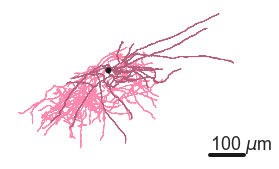

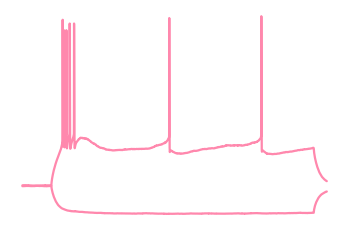

In [400]:
for cell in cells.index:
    print(cell)
    plot_trace_morph(cell, rotate=180, scale_factor=200)

In [20]:
cells = human_df[human_df.first_isi_inv_hero>100]
cells[cols]

,topLeaf,topLeafValue
spec_id,,
1036179989,Inh L1 SST NMBR (ADARB2+),0.72
1031694129,Inh L1 SST CHRNA4 (ADARB2+),0.72
1006066563,Inh L1-2 GAD1 MC4R (ADARB2+),0.71
1036182166,Inh L1-3 VIP ADAMTSL1,0.50
993417019,Inh L1-2 PAX6 CDH12,0.83
1030890136,Inh L1-4 VIP PENK,0.56
1047530184,Inh L2-6 LAMP5 CA1 (Igtp),0.24
855684267,Inh L1 SST NMBR (ADARB2+),0.20
1038297291,Inh L1 SST NMBR (ADARB2+),0.63


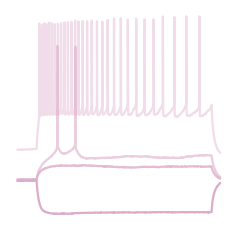

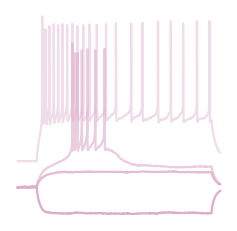

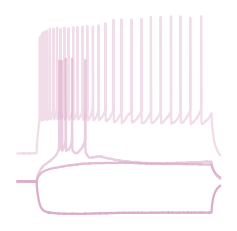

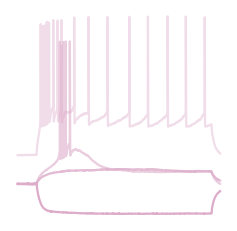

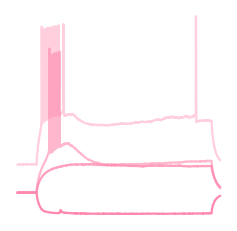

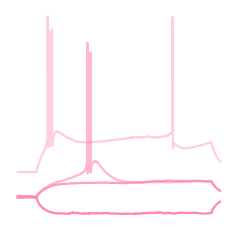

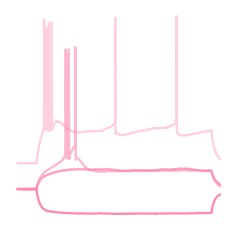

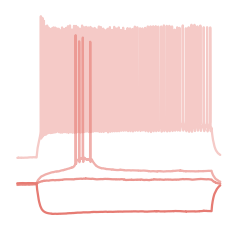

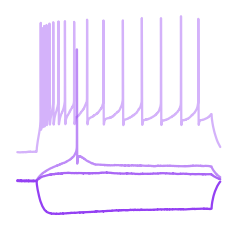

In [67]:
cells = human_df[human_df.first_isi_inv_hero>100]
for cell in cells.index:
    dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True, sweeps_query=None)
    ps.plot_sweep_panel(dataset, sweeps, color=palette_human[cells.loc[cell, cluster]])

1036182166


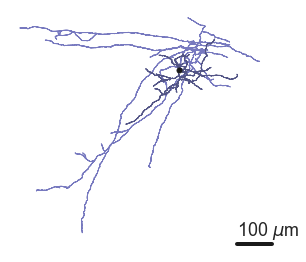

/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Short square
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Capacitance
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Chirp test
  warnings.warn("Could not find stimulus: %s" % tag)
/home/tom.chartrand/work/ipfx/ipfx/stimulus.py:90: UserWarning: Could not find stimulus: Triple
  warnings.warn("Could not find stimulus: %s" % tag)


x and y must have same first dimension, but have shapes (2320,) and (11600,)


<Figure size 432x288 with 0 Axes>

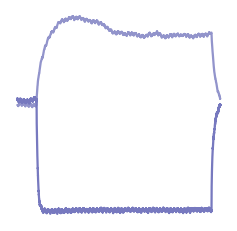

654341386


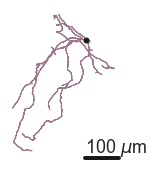

<Figure size 432x288 with 0 Axes>

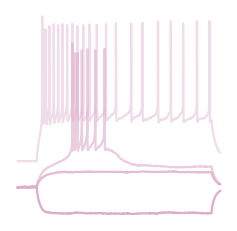

839970928


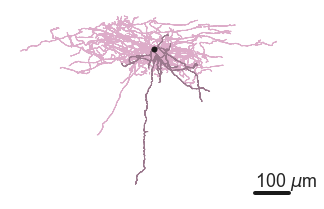

<Figure size 432x288 with 0 Axes>

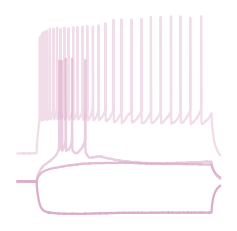

840043506


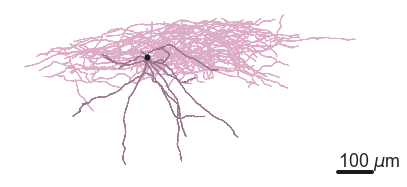

<Figure size 432x288 with 0 Axes>

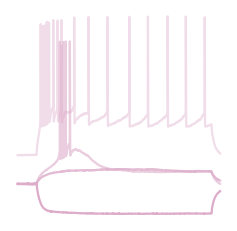

1001478009


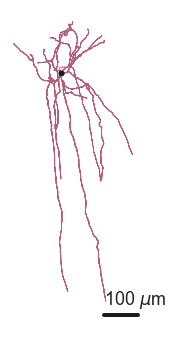

<Figure size 432x288 with 0 Axes>

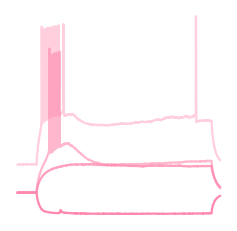

840142358


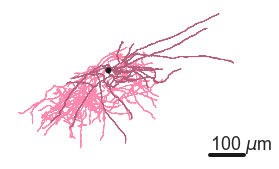

<Figure size 432x288 with 0 Axes>

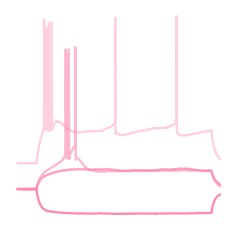

In [414]:
cells = human_df[human_df.first_isi_inv_hero>100]
for cell in cells.query('has_morph').index:
    print(cell)
    plot_trace_morph(cell, rotate=180, scale_factor=200)

839950125


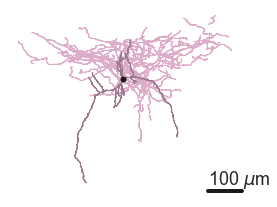

<Figure size 432x288 with 0 Axes>

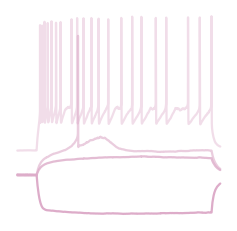

840043506


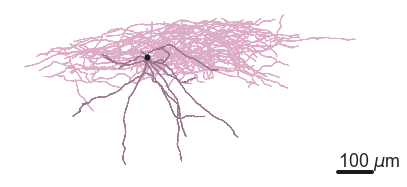

<Figure size 432x288 with 0 Axes>

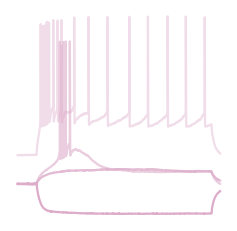

In [21]:
# morpho feature outliers
cells = [839950125, 840043506]
for cell in cells:
    print(cell)
    plot_trace_morph(cell, rotate=180, scale_factor=200)

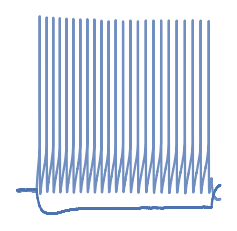

In [20]:
# culture TNFAIP, but bad mapping likely
cell = 1059245963
dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True)
ps.plot_sweep_panel(dataset, sweeps)

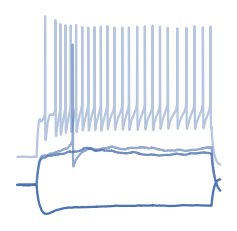

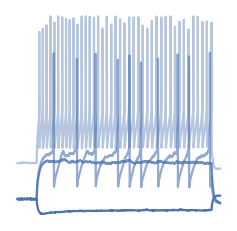

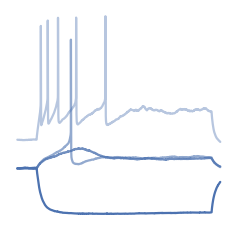

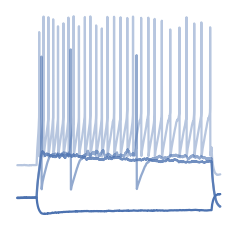

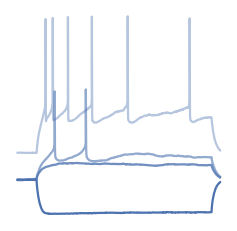

In [22]:
# culture CDH12
cells = [
    1002531918,
    966616798,
    954195973,
    847908829,
    819133824,
]
for cell in cells:
    dataset, sweeps = ps.get_dataset_sweeps(cell, lims_sweep_info=True, qc_sweeps=True)
    ps.plot_sweep_panel(dataset, sweeps)

## CDH12 comparison

742954760
742954760 morph
Error applying affine transform
list index out of range
742954760 ephys
dataset_for_specimen_id() got an unexpected keyword argument 'path'
654341386
654341386 morph
Error fetching SWC file name for specimen ID 654341386
list index out of range
654341386 ephys


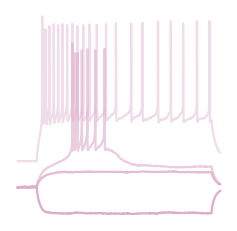

721688585
721688585 morph


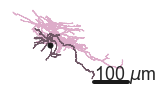

721688585 ephys


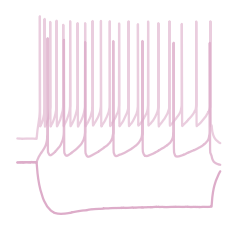

832614788
832614788 morph
Error applying affine transform
list index out of range
832614788 ephys


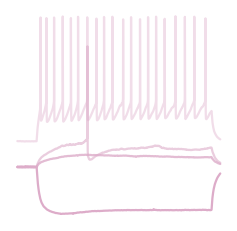

835572687
835572687 morph
Error applying affine transform
list index out of range
835572687 ephys


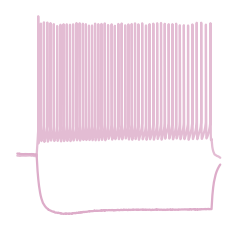

835648767
835648767 morph


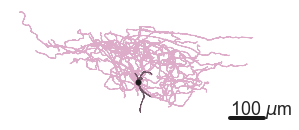

835648767 ephys


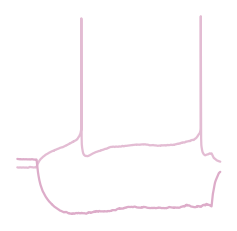

839950125
839950125 morph
Error applying affine transform
list index out of range
839950125 ephys


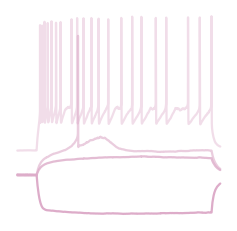

839970928
839970928 morph
Error applying affine transform
list index out of range
839970928 ephys


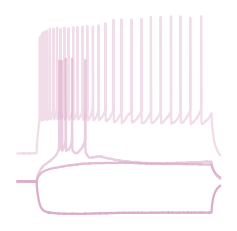

880352738
880352738 morph


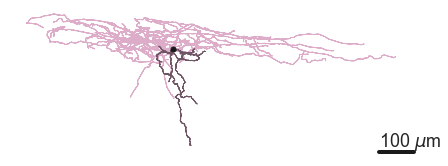

880352738 ephys


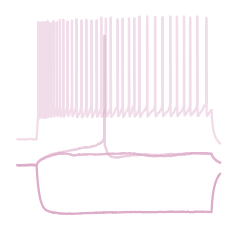

902511379
902511379 morph
Error applying affine transform
list index out of range
902511379 ephys


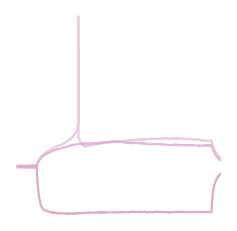

In [35]:
cells = human_df[human_df[cluster].str.contains("CDH12") & (human_df.topLeafValue==1)]
for cell in cells.query('has_morph').index:
    print(cell)
    plot_trace_morph(cell, rotate=True, scale_factor=200)